### Import套件

In [1]:
from selenium import webdriver
from selenium.webdriver.support.ui import Select
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import time
import re

### 用Selenium打開Chrome模擬器

In [2]:
#用webdriver.Chrome打開指定網頁
#Cupoy 熱門新聞
Cupoy='https://www.cupoy.com/newsfeed/topstory'
browser=webdriver.Chrome(executable_path='chromedriver')
browser.get(Cupoy)

### 抓取Cupoy 新聞 前 500 篇的「熱門新聞」文章

In [3]:
category=[]
title=[]
while True:
    #取得當前網頁元素
    soup=BeautifulSoup(browser.page_source, "lxml")
    #定位文章所放的位置
    all_news=soup.find('div',class_="ReactVirtualized__Grid__innerScrollContainer").find_all('div',class_="sc-eEieub sc-iuDHTM ibJqYc")
    
    #沒有重複的每個category,title都加到空list，以供等下做資料處理
    for i in all_news:
        if i.find('h6',class_='sc-erNlkL sc-ekulBa hDLssh').text not in title: 
            category.append(i.find('div',class_="sc-gacfCG bPSpUf").text)
            title.append(i.find('h6',class_='sc-erNlkL sc-ekulBa hDLssh').text)           
            if len(title)==500: #加上這一步可以精準地控制到500章
                break
                
    if len(title)==500:#當title數=500時，category也會是500，這時就可以結束迴圈
        break        
        
    #滾輪一次是100，一次模擬他滾5次的動作
    #他是動態網頁，他的文章顯示不會隨著捲動而數量疊加上去，
    #也就是說他一次會控制文章顯示數，所以我透過每次捲動一點去收集他的文章
    browser.execute_script("window.scrollBy(0, 500);")   

In [4]:
#把剛剛的category,title放到同一個list裡面以方便丟進pandas
category_n_title=[]
for i,o in zip(category,title):
    category_n_title.append([i,o])

In [5]:
#用pandas呈現
columns=['category','title']
data=pd.DataFrame(category_n_title,columns=columns)
pd.set_option('display.max_rows', None)
data

,category,title
0,科技,S2 恆星軌道進動完全吻合廣義相對論，愛因斯坦再度勝出 | TechNews 科技新報
1,遊戲情報,任天堂是怎麼做出《動物森友會》的？ | TechNews 科技新報
2,育兒,天才的生平告訴我們父母的重要：照臺灣人養小孩的概念，愛因斯坦也只能去領 22K | Buzz...
3,社交媒體,海底的數位驚奇：有微軟伺服器、養魚的 Google，還有超多 Facebook 電纜 | T...
4,科技,儲電新星液流電池改頭換面，成本降 50% 有望提高競爭力 | TechNews 科技新報
5,科技,市值翻倍、日活躍用戶暴漲、爭議四起……Zoom 要怎麼坐穩矽谷巨頭寶座？ | TechNew...
6,科技,中國產業斷鏈下的以腳投票，疫情後臺商的去留抉擇？ | TechNews 科技新報
7,財經,無須內褲外穿就能保護地球 實踐綠色消費，你也是超人 ｜ 整合傳播部 ｜ 換日線 Crossing
8,換日線 Crossing,孔德朗：我的「反送中」運動，與我的「親中派」父親 ｜ 香港世代羣像 ｜ 換日線 Crossing
9,換日線 Crossing,我們都曾為圓夢做足準備，卻對現實的變化措手不及──那些我在留學後才懂的事 ｜ 辣椒夫人 Ma...


### 前500篇的「熱門新聞」文章的各類別出現頻率(從高至低)

In [6]:
#根據類別的出現頻率做一個升降排序
data2=pd.DataFrame(data.groupby('category').size(),columns=['amounts'])
data2=data2.sort_values(by='amounts',ascending=False)
data3=data2.reset_index()
data3

,category,amounts
0,育兒,37
1,美食,33
2,享樂女性,27
3,科技,26
4,The News Lens 關鍵評論網,24
5,生活空間,15
6,職場白領,14
7,足球,12
8,職涯,12
9,理財,11


### 抽取前10個來做圓餅圖

In [7]:
data3['category'][:10]

0                     育兒
1                     美食
2                   享樂女性
3                     科技
4    The News Lens 關鍵評論網
5                   生活空間
6                   職場白領
7                     足球
8                     職涯
9                     理財
Name: category, dtype: object

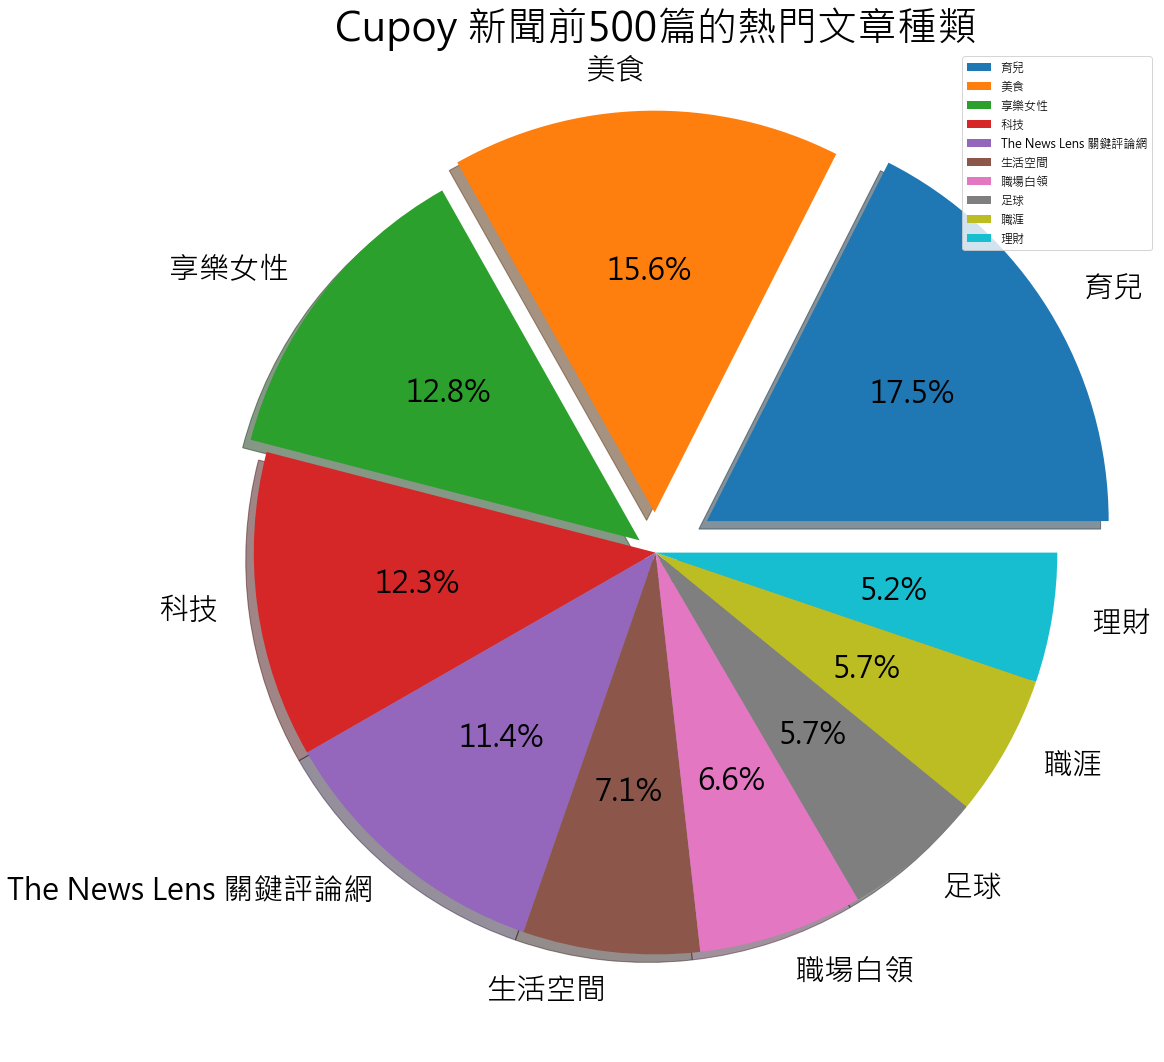

In [8]:
#讓plt可以呈現中文
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] 
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(18,20)) #圖形大小

labels = data3['category'][:10] #種類名稱
size = data3['amounts'][:10] #數據
explode = [0.15,0.1,0.05,0,0,0,0,0,0,0] #選擇哪些要突出
plt.pie(size,explode= explode, labels = labels, autopct= "%2.1f%%",\
        textprops = {"fontsize":30},shadow=True,startangle=360)
#autopct= "%0.1f%%"小數點前=前面顯示幾格，小數點後顯示幾個數字
plt.title("Cupoy 新聞前500篇的熱門文章種類", {"fontsize" : 40})  # 設定標題及其文字大小
plt.legend(loc = 1,fontsize = 'large') #示意圖的位置，字體大小
plt.show()

### 透過 jieba 等斷詞將文章標題拆解

In [9]:
data['title']

0            S2 恆星軌道進動完全吻合廣義相對論，愛因斯坦再度勝出 | TechNews 科技新報
1                      任天堂是怎麼做出《動物森友會》的？ | TechNews 科技新報
2      天才的生平告訴我們父母的重要：照臺灣人養小孩的概念，愛因斯坦也只能去領 22K | Buzz...
3      海底的數位驚奇：有微軟伺服器、養魚的 Google，還有超多 Facebook 電纜 | T...
4           儲電新星液流電池改頭換面，成本降 50% 有望提高競爭力 | TechNews 科技新報
5      市值翻倍、日活躍用戶暴漲、爭議四起……Zoom 要怎麼坐穩矽谷巨頭寶座？ | TechNew...
6               中國產業斷鏈下的以腳投票，疫情後臺商的去留抉擇？ | TechNews 科技新報
7       無須內褲外穿就能保護地球 實踐綠色消費，你也是超人 ｜ 整合傳播部 ｜ 換日線 Crossing
8       孔德朗：我的「反送中」運動，與我的「親中派」父親 ｜ 香港世代羣像 ｜ 換日線 Crossing
9      我們都曾為圓夢做足準備，卻對現實的變化措手不及──那些我在留學後才懂的事 ｜ 辣椒夫人 Ma...
10     韓國國會大選結果出爐──文在寅能否擺脫歷任韓國總統的「宿命」？ ｜ Mark Lin／五道口...
11     「我可以打造你，也可以摧毀你」：維多利亞的祕密，驚曝埋藏多年的「厭女文化」 ｜ 國際譯開罐 ...
12                                   Google 似乎準備推出智慧型金融卡
13                                  今年的 MWC 上海也因為新冠疫情取消了
14                      NASA、SpaceX 合作的首個載人任務定檔 5 月 27 日
15                                  「擊出全壘打」的英文怎麼說？ | 經理人
16     世界過於複雜，我們還是去逗貓好了！插畫家 Zu Lau 用畫筆表現「線」與「貓」兩者相遇的簡...
17     農夫告訴你真正土鳳梨的滋味：你吃的土鳳梨，其實是

### stop words 過濾

In [10]:
#建一個Filter，把他原本建議的一些stop words 加進來後，再根據結果新增一些stop words 
import jieba
cut=[]
def cutter(number):
    words = jieba.cut(data['title'][number], cut_all=False)
    stop_words=[' ','　','你','在','有','於','也','人','好','’','／','─','…','','-','！','「','」',\
                '、','？','：','｜','】','【','》','《','–','(',')','.','the','of','is',\
                'and','to','in','that','we','for','an','are','by','be','as','on','with',\
                'can','if','from','which','you','it','this','then','at','have','all','not',\
                'one','has','or','that','|','，',',','的','了','和','是','就','都','而','及',\
                '與','著','或','一個','沒有','我們','你們','妳們','他們','她們','是否']
    for i in words: 
        if i not in stop_words:
            cut.append(i)

In [11]:
#cutter 開始斷詞
count=0
for i in range(500):
    cutter(count)
    count+=1

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\GP73\AppData\Local\Temp\jieba.cache
Loading model cost 0.596 seconds.
Prefix dict has been built successfully.


### 計算同樣文字出現的頻率

In [12]:
#用pandas為文字出現的頻率做groupby去看他的總數且做排序
columns=['關鍵字']
df=pd.DataFrame(cut,columns=columns)
df=pd.DataFrame(df.groupby('關鍵字').size(),columns=['amounts'])
df=df.sort_values(by='amounts',ascending=False)
df

,amounts
關鍵字,
旅遊,84
臺,73
ETtoday,52
The,41
關鍵,39
News,38
新聞,36
世界,36
評論網,35


###  wordcloud 文字雲的方式呈現

In [13]:
#pandas dataframe轉為dict
df_dict=df.to_dict(orient="dict")

In [14]:
df_dict_done=df_dict['amounts']

In [15]:
from wordcloud import WordCloud

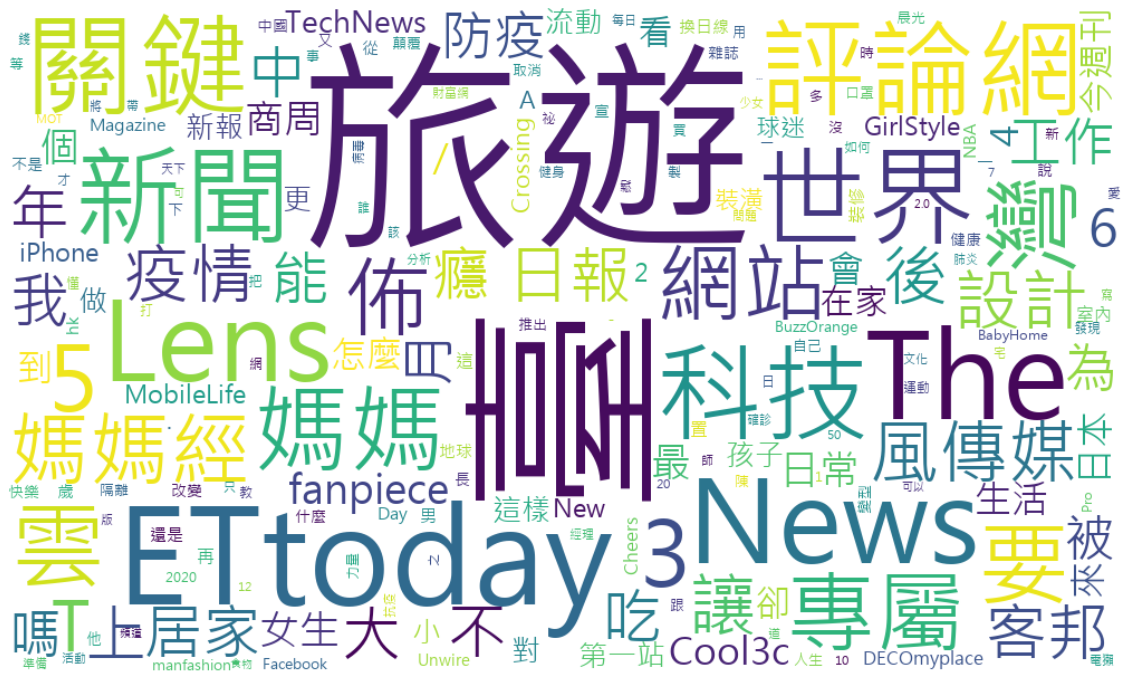

In [16]:
wc = WordCloud(background_color='white',width=1000, height=600, margin=2,font_path= r'msjh.ttc',random_state=None)
wc.generate_from_frequencies(df_dict_done)
plt.figure(figsize=(20,20))
plt.imshow(wc,interpolation='bilinear')
plt.axis("off")
plt.show()